In [1]:
import os
import cv2
import numpy as np
import torch
import torchvision
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
%matplotlib inline

/home/azza/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/azza/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:59: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


## Data sets

Image datasets:

1. Training number plate detection model -- CCPD2020: https://github.com/detectRecog/CCPD

2. Testing vehicle detection model and vehicle speed algorithms -- UA-DETRAC: https://detrac-db.rit.albany.edu/download

3. Training OCR model -- Licence plate digits classification datasets (using EU licence plates): https://www.kaggle.com/datasets/aladdinss/license-plate-digits-classification-dataset?resource=download

4. Testing vehicle detection model and vehicle speed algorithms -- UFPR-ALPR Dataset: https://web.inf.ufpr.br/vri/databases/ufpr-alpr/

## image exploration

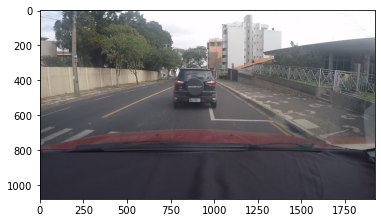

In [2]:
# Load image
image_path = 'track009101.png'
image = cv2.imread(image_path)

# Convert from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display image using OpenCV
#cv2.imshow('Image', image)
#cv2.waitKey(1)
#cv2.destroyAllWindows()

# Display image using Matplotlib
plt.imshow(image)
plt.show()


## image as an array

In [3]:
image.shape

(1080, 1920, 3)

In [4]:
image

array([[[198, 206, 218],
        [198, 206, 218],
        [203, 209, 221],
        ...,
        [255, 254, 255],
        [255, 254, 255],
        [255, 254, 255]],

       [[216, 224, 236],
        [209, 217, 229],
        [201, 207, 219],
        ...,
        [255, 254, 255],
        [255, 254, 255],
        [255, 254, 255]],

       [[227, 233, 246],
        [227, 233, 246],
        [228, 234, 247],
        ...,
        [255, 254, 255],
        [255, 254, 255],
        [255, 254, 255]],

       ...,

       [[ 44,  43,  53],
        [ 44,  43,  53],
        [ 43,  42,  52],
        ...,
        [ 44,  41,  52],
        [ 44,  41,  52],
        [ 44,  41,  52]],

       [[ 43,  42,  52],
        [ 43,  42,  52],
        [ 42,  41,  51],
        ...,
        [ 44,  41,  52],
        [ 44,  41,  52],
        [ 44,  41,  52]],

       [[ 43,  42,  52],
        [ 43,  42,  52],
        [ 42,  41,  51],
        ...,
        [ 44,  41,  52],
        [ 44,  41,  52],
        [ 44,  41,  52]]

## Vehicle detection with YOLOv5s

Let's use a pre-trained yolov5 model for vehicle detection purpose.

### Model

In [5]:
# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


Using cache found in /home/azza/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-9 Python-3.9.2 torch-2.0.0+cu117 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


### Checking on classes available in yolov5s

In [6]:
# Print available classes
class_names = model.module.names if hasattr(model, 'module') else model.names
print(class_names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

#### Detection 1

image 1/1: 1080x1920 2 cars
Speed: 50.5ms pre-process, 8194.9ms inference, 26.5ms NMS per image at shape (1, 3, 384, 640)
         xmin        ymin         xmax         ymax  confidence  class name
0  757.713562  326.862701  1015.886414   558.554565    0.842669      2  car
1   93.439270  641.203674  1912.395630  1066.312988    0.290309      2  car
757 1015 326 558
93 1912 641 1066


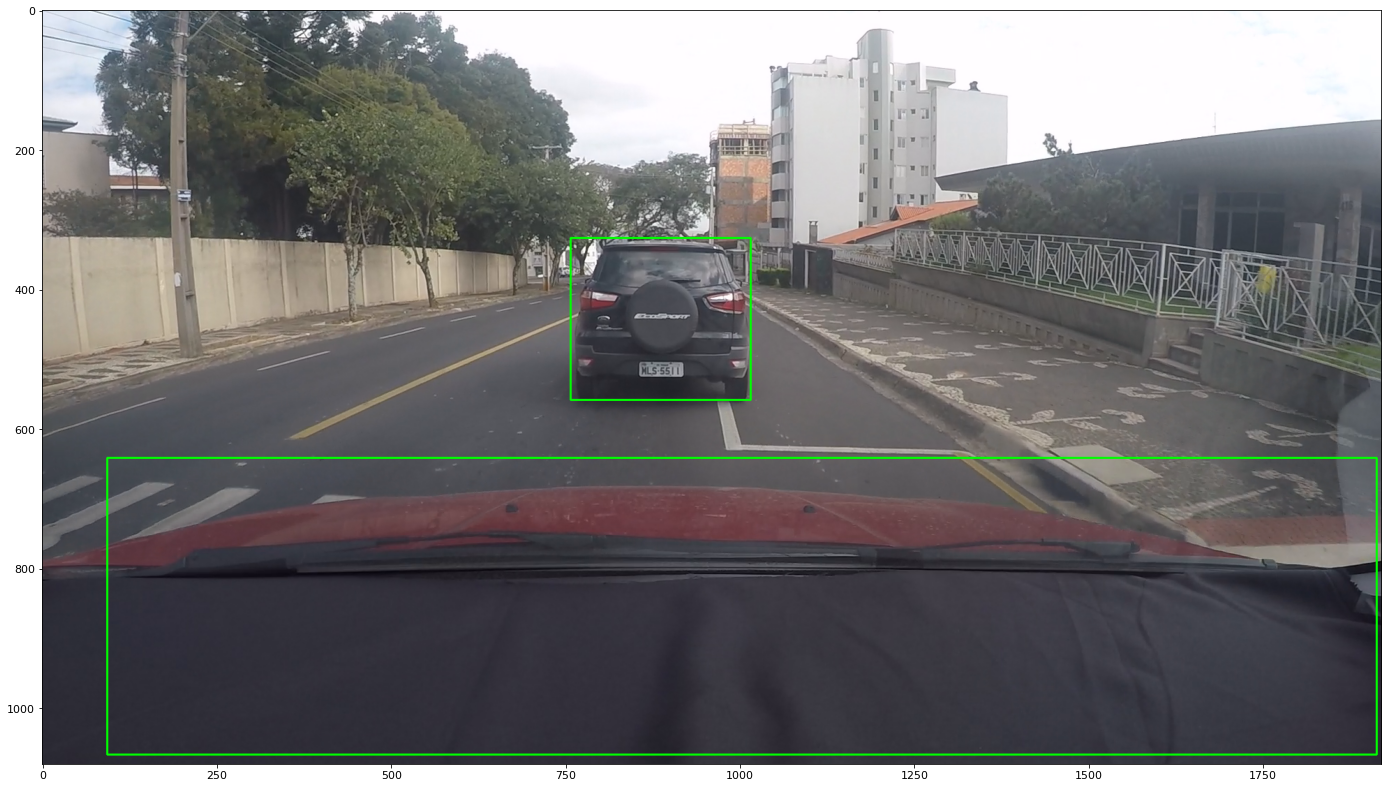

In [7]:



# Load image
#img = cv2.imread('path/to/image.jpg')

# Detect objects in image
results = model(image)
print(results)

# Get vehicle detections
vehicle_results = results.pandas().xyxy[0][(results.pandas().xyxy[0]['name'] == 'car')\
                                           |(results.pandas().xyxy[0]['name'] == 'motorcycle')\
                                           |(results.pandas().xyxy[0]['name'] == 'bus')\
                                           |(results.pandas().xyxy[0]['name'] == 'truck')]
print(vehicle_results)

# Draw bounding boxes around detected vehicles
for index, row in vehicle_results.iterrows():
    x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
    print(x1,x2,y1,y2)
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display image with detections
# cv2.imshow('Image with vehicle detections', image)
# cv2.waitKey(1)
# cv2.destroyAllWindows()

fig = plt.figure(figsize=(24, 18))
plt.imshow(image)
plt.show()


#### Detection 2

In [8]:
# Load image
image_path2 = 'track012801.png'
image2 = cv2.imread(image_path2)


image 1/1: 1080x1920 6 persons, 1 car, 1 traffic light
Speed: 58.2ms pre-process, 5551.4ms inference, 0.5ms NMS per image at shape (1, 3, 384, 640)
         xmin        ymin        xmax        ymax  confidence  class name
2  759.106689  502.443237  1060.72229  752.824036    0.830625      2  car
759 1060 502 752


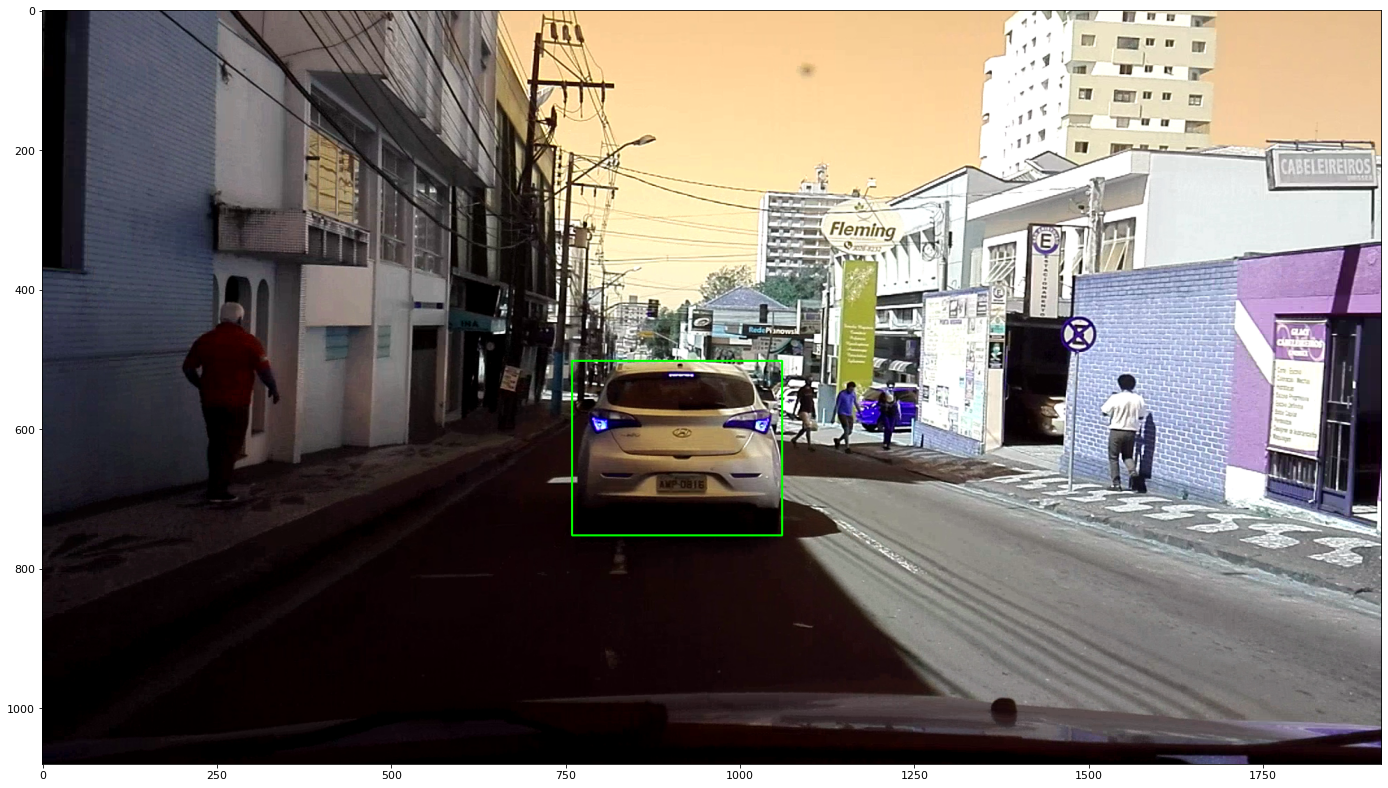

In [9]:
# Load YOLOv5 model
#model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load image
#img = cv2.imread('path/to/image.jpg')

# Detect objects in image
results = model(image2)
print(results)

# Get vehicle detections
vehicle_results = results.pandas().xyxy[0][(results.pandas().xyxy[0]['name'] == 'car')\
                                           |(results.pandas().xyxy[0]['name'] == 'motorcycle')\
                                           |(results.pandas().xyxy[0]['name'] == 'bus')\
                                           |(results.pandas().xyxy[0]['name'] == 'truck')]
print(vehicle_results)

# Draw bounding boxes around detected vehicles
for index, row in vehicle_results.iterrows():
    x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
    print(x1,x2,y1,y2)
    cv2.rectangle(image2, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display image with detections
# cv2.imshow('Image with vehicle detections', image2)
# cv2.waitKey(1)
# cv2.destroyAllWindows()

fig = plt.figure(figsize=(24, 18))
plt.imshow(image2)
plt.show()


#### Detection 3

In [10]:
# Load image
image_path3 = 'img00001.jpg'
image3 = cv2.imread(image_path3)


image 1/1: 540x960 6 persons, 21 cars, 1 train, 1 truck, 1 traffic light
Speed: 49.3ms pre-process, 7946.0ms inference, 69.8ms NMS per image at shape (1, 3, 384, 640)
          xmin        ymin        xmax        ymax  confidence  class   name
0   560.759583  119.842628  603.833313  162.196869    0.799290      2    car
1   913.900879   73.827324  955.034790   98.596481    0.762645      2    car
2   180.777115  162.000229  245.238846  213.758331    0.751277      2    car
3   117.045753  182.353271  212.538208  253.558777    0.740586      2    car
4   219.585495  144.355148  279.082489  187.628876    0.715982      2    car
5   930.028198   99.784798  960.000000  126.284760    0.715605      2    car
7   545.383911   84.776093  578.809631  116.562286    0.645931      2    car
9   286.846466  111.311668  337.373505  150.524368    0.580958      2    car
10  732.016174  115.849922  779.674683  153.121292    0.565431      2    car
11  252.461990  125.463303  308.623596  170.631485    0.534270 

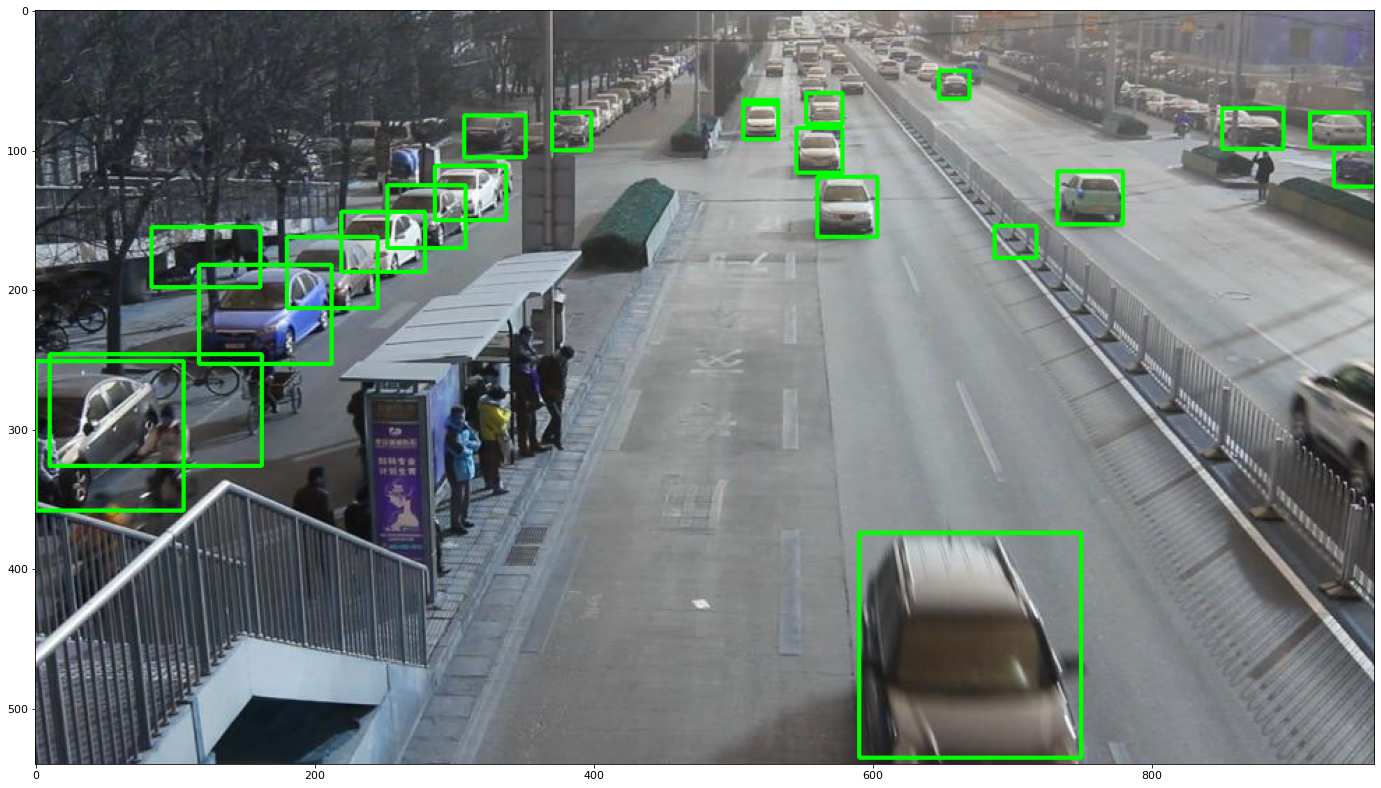

In [11]:
# Load YOLOv5 model
#model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load image
#img = cv2.imread('path/to/image.jpg')

# Detect objects in image
results = model(image3)
print(results)

# Get vehicle detections
vehicle_results = results.pandas().xyxy[0][(results.pandas().xyxy[0]['name'] == 'car')\
                                           |(results.pandas().xyxy[0]['name'] == 'motorcycle')\
                                           |(results.pandas().xyxy[0]['name'] == 'bus')\
                                           |(results.pandas().xyxy[0]['name'] == 'truck')]
print(vehicle_results)

# Draw bounding boxes around detected vehicles
for index, row in vehicle_results.iterrows():
    x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
    print(x1,x2,y1,y2)
    cv2.rectangle(image3, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display image with detections
# cv2.imshow('Image with vehicle detections', image2)
# cv2.waitKey(1)
# cv2.destroyAllWindows()

fig = plt.figure(figsize=(24, 18))
plt.imshow(image3)
plt.show()


#### Detection 4

image 1/1: 1080x1920 1 person, 6 cars, 1 motorcycle, 2 trucks
Speed: 41.4ms pre-process, 6154.5ms inference, 0.6ms NMS per image at shape (1, 3, 384, 640)
          xmin        ymin         xmax         ymax  confidence  class  \
0    84.887283  521.138123   309.519928   603.736877    0.869964      2   
1   835.567017  625.954224   935.732483   793.576233    0.772305      3   
2     0.000000  539.773132    91.873795   615.657532    0.746795      2   
4   990.507812  549.738098  1138.313599   675.852905    0.687730      2   
5     0.652113  654.037964    97.907593  1058.117310    0.623340      2   
6  1144.334839  594.959595  1187.902588   636.963135    0.597384      2   
7  1198.057373  603.151245  1264.722656   646.986877    0.586510      2   
8   991.128906  537.482239  1137.442749   675.595093    0.321086      7   
9  1141.153076  491.125793  1335.137329   630.846680    0.288754      7   

         name  
0         car  
1  motorcycle  
2         car  
4         car  
5         car 

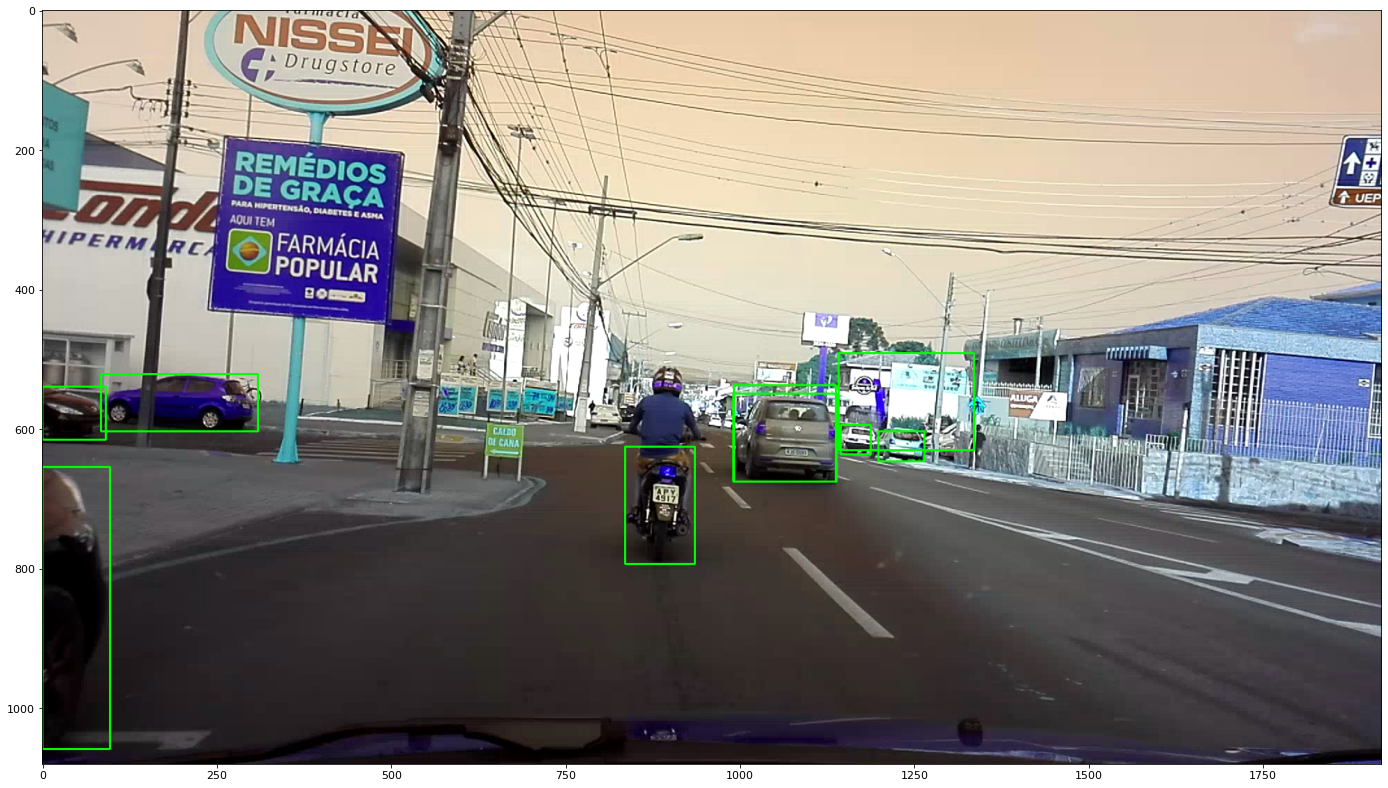

In [12]:
# Load image
image_path4 = 'track003701.png'
image4 = cv2.imread(image_path4)

# Load YOLOv5 model
#model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load image
#img = cv2.imread('path/to/image.jpg')

# Detect objects in image
results = model(image4)
print(results)

# Get vehicle detections
vehicle_results = results.pandas().xyxy[0][(results.pandas().xyxy[0]['name'] == 'car')\
                                           |(results.pandas().xyxy[0]['name'] == 'motorcycle')\
                                           |(results.pandas().xyxy[0]['name'] == 'bus')\
                                           |(results.pandas().xyxy[0]['name'] == 'truck')]
print(vehicle_results)

# Draw bounding boxes around detected vehicles
for index, row in vehicle_results.iterrows():
    x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
    print(x1,x2,y1,y2)
    cv2.rectangle(image4, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display image with detections
# cv2.imshow('Image with vehicle detections', image2)
# cv2.waitKey(1)
# cv2.destroyAllWindows()

fig = plt.figure(figsize=(24, 18))
plt.imshow(image4)
plt.show()



## Extracting a vehicle from the whole image

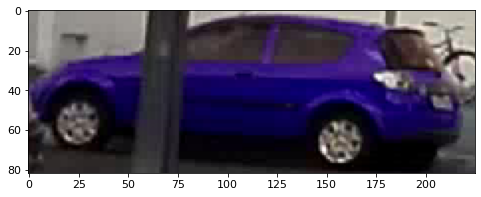

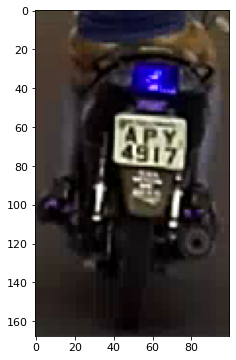

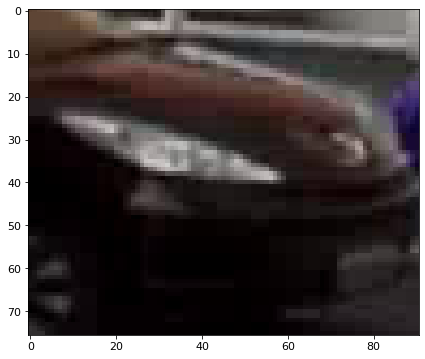

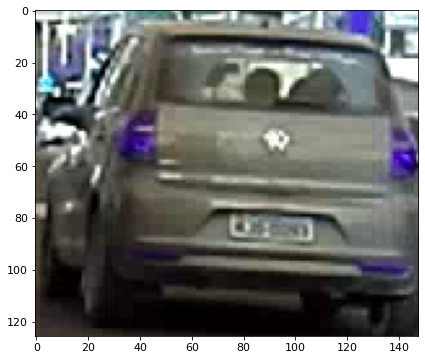

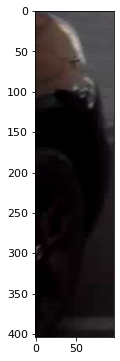

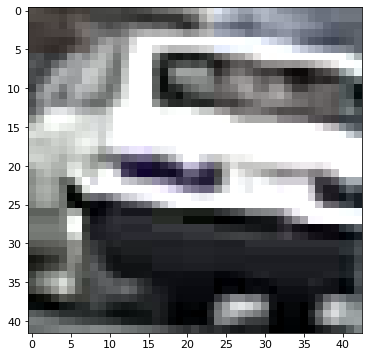

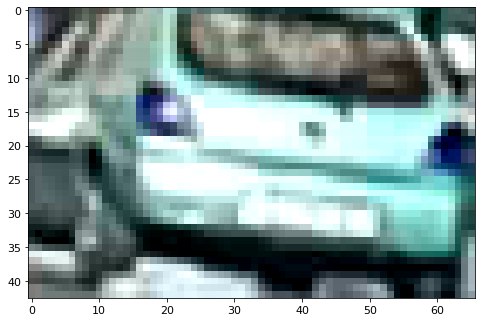

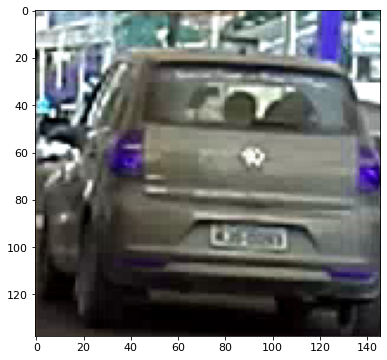

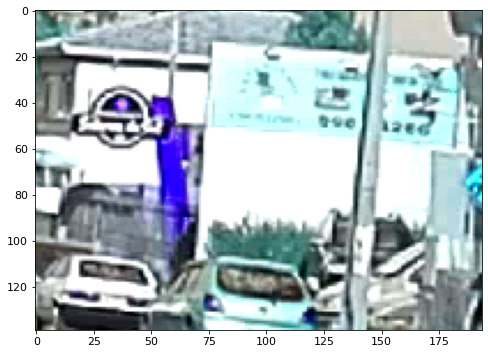

In [13]:
# Extract detected vehicles
image4 = cv2.imread(image_path4)
for index, row in vehicle_results.iterrows():
    x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
    vehicle_image = image4[y1:y2, x1:x2]
    fig = plt.figure(figsize=(8, 6))
    plt.imshow(vehicle_image)
plt.show()

## Detecting the number plate

Now let's fine tune the yolov5 for specifically detecting number plates

#### number plate data prparation (re annotation)

train dataset anotation

In [14]:
# import os
# img_dir = '/home/azza/Documents/CCPD2020/ccpd_green/train'

# # Set the path to your YOLOv5 annotation file
# ann_dir = '/home/azza/Documents/CCPD2020/ccpd_green/trainannotations'

# # Define class labels (in CCPD dataset, there is only one class)
# class_label = 0
# img_width= 720#image.shape[1]
# img_height=1160#image.shape[0]


# # loop over all images in the directory
# for img_file in os.listdir(img_dir):
#     # check if file is an image
#     if img_file.endswith(".jpg") or img_file.endswith(".jpeg") or img_file.endswith(".png"):
#         # get image filename without extension
#         img_name = os.path.splitext(img_file)[0]
#         # set annotation filename
#         ann_file = img_name + ".txt"
#         # open annotation file for writing
#         with open(os.path.join(ann_dir, ann_file), "w") as f:
#             # Split the image file name using the delimiter "-"
#             fields = img_file.split('-')
#             # Extract the bounding box coordinates
#             minn,maxx= map(str, fields[2].split('_'))
#             x1, y1= map(int, minn.split('&'))
#             x2, y2 = map(int, maxx.split('&'))

#             # Convert the coordinates to YOLOv5 format
#             width = x2 - x1
#             height = y2 - y1
#             x_center = x1 + (width / 2)
#             y_center = y1 + (height / 2)
            
#             x_center = x_center / img_width
#             y_center = y_center / img_height
#             width = width / img_width
#             height = height / img_height

#             f.write(f"{class_label} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")
   

validation dataset anotation

In [15]:
# import os
# img_dir = '/home/azza/Documents/CCPD2020/ccpd_green/val'

# # Set the path to your YOLOv5 annotation file
# ann_dir = '/home/azza/Documents/CCPD2020/ccpd_green/valannotations'

# # Define class labels (in CCPD dataset, there is only one class)
# class_label = 0
# img_width= 720#image.shape[1]
# img_height=1160#image.shape[0]


# # loop over all images in the directory
# for img_file in os.listdir(img_dir):
#     # check if file is an image
#     if img_file.endswith(".jpg") or img_file.endswith(".jpeg") or img_file.endswith(".png"):
#         # get image filename without extension
#         img_name = os.path.splitext(img_file)[0]
#         # set annotation filename
#         ann_file = img_name + ".txt"
#         # open annotation file for writing
#         with open(os.path.join(ann_dir, ann_file), "w") as f:
#             # Split the image file name using the delimiter "-"
#             fields = img_file.split('-')
#             # Extract the bounding box coordinates
#             minn,maxx= map(str, fields[2].split('_'))
#             x1, y1= map(int, minn.split('&'))
#             x2, y2 = map(int, maxx.split('&'))

#             # Convert the coordinates to YOLOv5 format
#             width = x2 - x1
#             height = y2 - y1
#             x_center = x1 + (width / 2)
#             y_center = y1 + (height / 2)
            
#             x_center = x_center / img_width
#             y_center = y_center / img_height
#             width = width / img_width
#             height = height / img_height

#             f.write(f"{class_label} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

test dataset annotation

In [16]:
# import os
# img_dir = '/home/azza/Documents/CCPD2020/ccpd_green/test'

# # Set the path to your YOLOv5 annotation file
# ann_dir = '/home/azza/Documents/CCPD2020/ccpd_green/testannotations'

# # Define class labels (in CCPD dataset, there is only one class)
# class_label = 0
# img_width= 720#image.shape[1]
# img_height=1160#image.shape[0]


# # loop over all images in the directory
# for img_file in os.listdir(img_dir):
#     # check if file is an image
#     if img_file.endswith(".jpg") or img_file.endswith(".jpeg") or img_file.endswith(".png"):
#         # get image filename without extension
#         img_name = os.path.splitext(img_file)[0]
#         # set annotation filename
#         ann_file = img_name + ".txt"
#         # open annotation file for writing
#         with open(os.path.join(ann_dir, ann_file), "w") as f:
#             # Split the image file name using the delimiter "-"
#             fields = img_file.split('-')
#             # Extract the bounding box coordinates
#             minn,maxx= map(str, fields[2].split('_'))
#             x1, y1= map(int, minn.split('&'))
#             x2, y2 = map(int, maxx.split('&'))

#             # Convert the coordinates to YOLOv5 format
#             width = x2 - x1
#             height = y2 - y1
#             x_center = x1 + (width / 2)
#             y_center = y1 + (height / 2)
            
#             x_center = x_center / img_width
#             y_center = y_center / img_height
#             width = width / img_width
#             height = height / img_height

#             f.write(f"{class_label} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

After data re-annotation, a YAML file format that links the model to the traing and testing dataset is created.

The file includes the discription about the object classes targeted in the detection process. In this case we target one class 'number plate'

#### fine tuning yolov5s

In [17]:
#!python /home/azza/.cache/torch/hub/ultralytics_yolov5_master/train.py --img 640 --batch 16 --epochs 50 --data /home/azza/Documents/data.yaml --weights /home/azza/Documents/DATADATA/yolov5s.pt --name my_model --single-cls --project /home/azza/Documents




# python train.py --img 640 --epochs 3 --data coco128.yaml --weights yolov5s.pt


#### testing finetuned yolov5s

In [18]:
# !python detect.py --source data/test/images/ --weights runs/train/my_model/weights/best.pt --conf 0.4 --save-txt --exist-ok

#!python /home/azza/.cache/torch/hub/ultralytics_yolov5_master/detect.py --weights '/home/azza/Documents/my_model2/weights/best.pt' --img 640 --conf 0.5 --source '/home/azza/Documents/CCPD2020/ccpd_green/test/images' --save-txt --save-conf



#### saving the fine tuned YOLOv5 in onother file

In [19]:
#!cp /home/azza/Documents/my_model2/weights/best.pt /home/azza/Documents/finetunedyolov5s/yolov5s_npd.pt


#### loading the model again to detect the number plates

Using cache found in /home/azza/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-9 Python-3.9.2 torch-2.0.0+cu117 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


image 1/1: 4096x2304 1 number plate
Speed: 124.0ms pre-process, 6184.9ms inference, 23.9ms NMS per image at shape (1, 3, 640, 384)
xmin: 801.7811279296875 ymin: 1474.8319091796875 xmax: 1436.6514892578125 ymax: 1702.0238037109375


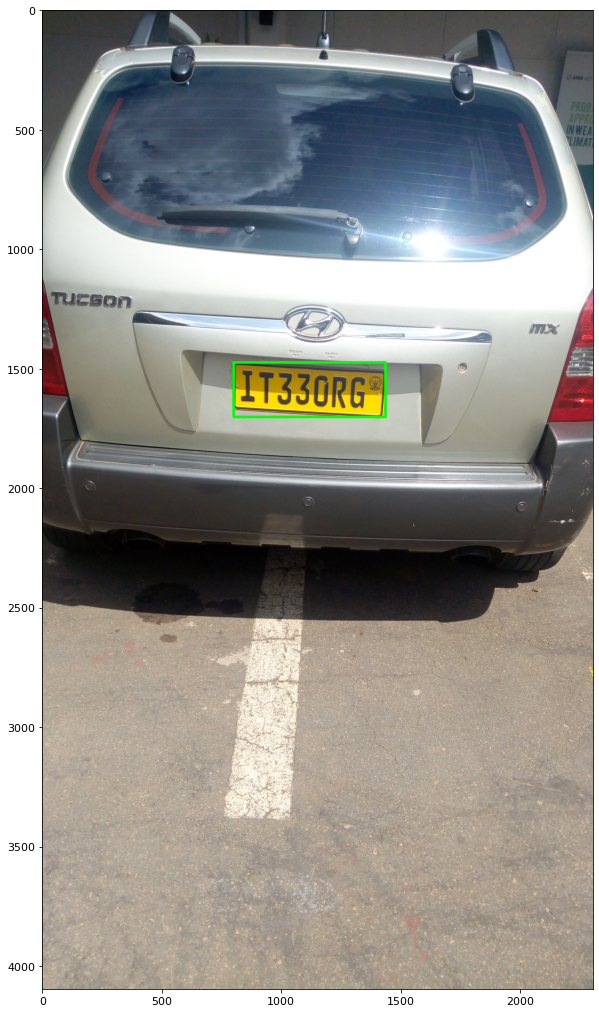

In [20]:
import torch
from PIL import Image

# Load an image
imagepath='/home/azza/Documents/DATADATA/car2.jpg'
modelpath='/home/azza/Documents/my_model2/weights/best.pt'
img = Image.open(imagepath)

# Load the model
model2 = torch.hub.load('ultralytics/yolov5', 'custom', modelpath)#path_or_model=

# Get the detections
results = model2(img)
print(results)
number_plate_results = results.xyxy[0]#results.pandas().xyxy[0]
# Extract bounding box coordinates
for detection in number_plate_results:
    x1, y1, x2, y2 = detection[:4].tolist()  # Get the coordinates as a list
    img_w, img_h = img.size
    print("xmin:", x1, "ymin:", y1, "xmax:", x2, "ymax:", y2)

image = cv2.imread(imagepath)
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#if results[0] is not None:
for x1, y1, x2, y2, conf, cls in number_plate_results:
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), thickness=10)

       
fig = plt.figure(figsize=(24, 18))
plt.imshow(image)
plt.show()

plt.imsave('NPD.jpg', image)#cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))

#### extracting the number plate from the whole vehicle image

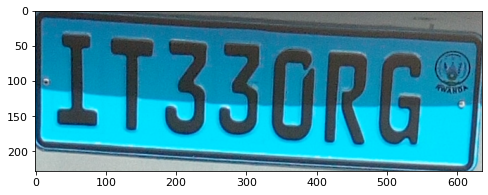

In [21]:
x1, y1, x2, y2 = detection[:4].tolist()
# Extract detected number plate
#for index, row in number_plate_results.iterrows():
x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
image = cv2.imread(imagepath)
number_plate_image = image[y1:y2, x1:x2]
fig = plt.figure(figsize=(8, 6))
plt.imshow(number_plate_image)
plt.show()


gray_number_plate_image=cv2.cvtColor(number_plate_image, cv2.COLOR_BGR2GRAY)
plt.imsave('number_plate_image.jpg', gray_number_plate_image, cmap='gray')

# Vehicle speed estimation
Now that we have vehicle detection model (yolov5), we can combine it with optical flow algorithm to estimate the speed.

#### Optical flow (Lucas Kanade)

In [31]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /home/azza/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-9 Python-3.9.2 torch-2.0.0+cu117 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


##### First step
Testing the lucas kanade algorithm

In [32]:
import numpy as np
import cv2

# Read the input video
cap = cv2.VideoCapture('car.mp4')

# Read the first frame of the video
ret, frame1 = cap.read()
prev_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

# Read the second frame of the video
ret, frame2 = cap.read()
gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

# Define the parameters for Shi-Tomasi corner detection
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

# Define the parameters for the Lucas-Kanade optical flow algorithm
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Get the initial set of feature points in the first frame
prev_points = cv2.goodFeaturesToTrack(prev_gray, mask=None, **feature_params)

# Calculate the optical flow using the Lucas-Kanade algorithm
next_points, status, error = cv2.calcOpticalFlowPyrLK(prev_gray, gray, prev_points, None, **lk_params)

# Select good feature points for the next iteration
good_new = next_points[status == 1]
good_old = prev_points[status == 1]

# Calculate the average speed of the moving object between the first two frames
speeds = []
for i, (new, old) in enumerate(zip(good_new, good_old)):
    speed = np.linalg.norm(new - old)
    speeds.append(speed)
average_speed = sum(speeds) / len(speeds)
print(f"Average speed of the moving object between the first two frames: {average_speed:.2f} pixels/frame")

# Convert average speed to pixels per second
fps = 30/2  # 30 frames in 2 seconds
pixels_per_second = average_speed * fps
print(f"Pixels per second: {pixels_per_second:.2f}")

# # Draw the tracks
# for i, (new, old) in enumerate(zip(good_new, good_old)):
#     a, b = new.ravel().astype(np.int)
#     c, d = old.ravel().astype(np.int)
#     frame2 = cv2.line(frame2, (a, b), (c, d), (0, 255, 0), 2)
#     frame2 = cv2.circle(frame2, (a, b), 5, (0, 0, 255), -1)

# Display the resulting frame
#plt.imshow( frame2)#'Lucas-Kanade Optical Flow',
#plt.show()
# Wait for a key press and then quit
#cv2.waitKey(0)
#cv2.destroyAllWindows()


Average speed of the moving object between the first two frames: 14.69 pixels/frame
Pixels per second: 220.36


In [33]:
import numpy as np
import cv2

# Read the input video
cap = cv2.VideoCapture('car.mp4')

# Read the first frame of the video
ret, frame1 = cap.read()
prev_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

# Read the second frame of the video
ret, frame2 = cap.read()
gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

# Define the parameters for Shi-Tomasi corner detection
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

# Define the parameters for the Lucas-Kanade optical flow algorithm
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Get the initial set of feature points in the first frame
prev_points = cv2.goodFeaturesToTrack(prev_gray, mask=None, **feature_params)

# Calculate the optical flow using the Lucas-Kanade algorithm
next_points, status, error = cv2.calcOpticalFlowPyrLK(prev_gray, gray, prev_points, None, **lk_params)

# Select good feature points for the next iteration
good_new = next_points[status == 1, np.newaxis]
good_old = prev_points[status == 1, np.newaxis]

# Calculate the average speed between the first two frames
speeds = np.sqrt((good_new[0, :, 0] - good_old[0, :, 0])**2 + (good_new[0, :, 1] - good_old[0, :, 1])**2)
average_speed = np.mean(speeds)

# Convert average speed to pixels per second
fps = 30/2  # 30 frames in 2 seconds
pixels_per_second = average_speed * fps

# Print the result
print(f"Average speed of the moving object between the first two frames: {average_speed:.2f} pixels/frame")
print(f"Pixels per second: {pixels_per_second:.2f}")


Average speed of the moving object between the first two frames: 13.20 pixels/frame
Pixels per second: 198.01


#### Step 2
Entegrating yolov5 with lucas kanade algorithm

In [34]:
import cv2
import numpy as np
import torch
import time


# Read the input video
cap = cv2.VideoCapture('car.mp4')

# Read the first frame of the video
ret, frame1 = cap.read()
prev_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

# Read the second frame of the video
ret, frame2 = cap.read()
gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

# Detect vehicles in the first frame using YOLOv5
detections = model(frame1)
vehicle_results = detections.pandas().xyxy[0][(detections.pandas().xyxy[0]['name'] == 'car')\
                                           |(detections.pandas().xyxy[0]['name'] == 'motorcycle')\
                                           |(detections.pandas().xyxy[0]['name'] == 'bus')\
                                           |(detections.pandas().xyxy[0]['name'] == 'truck')] 
# Extract bounding boxes and centroids of detected vehicles
bboxes = []
centroids = []
for index, row in vehicle_results.iterrows():
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        bbox=[x1, y1, x2, y2]
        cx, cy = (x1+x2)/2, (y1+y2)/2
        bboxes.append(bbox)
        centroids.append((cx, cy))

        
        
# Get the initial set of feature points in the first frame
prev_points = np.array(centroids).astype(np.float32).reshape(-1, 1, 2)

# Calculate the optical flow using the Lucas-Kanade algorithm
next_points, status, error = cv2.calcOpticalFlowPyrLK(prev_gray, gray, prev_points, None, winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Select good feature points for the next iteration
good_new = next_points[status == 1]
good_old = prev_points[status == 1]

# Draw the tracks
for i, (new, old) in enumerate(zip(good_new, good_old)):
    a, b = new.ravel().astype(np.int)
    c, d = old.ravel().astype(np.int)
    frame2 = cv2.line(frame2, (a, b), (c, d), (0, 255, 0), 2)
    frame2 = cv2.circle(frame2, (a, b), 5, (0, 0, 255), -1)

# Calculate the average speed between the first two frames for vehicles detected by YOLOv5
#speeds = np.sqrt((good_new[:,0,0] - good_old[:,0,0])**2 + (good_new[:,0,1] - good_old[:,0,1])**2)
speeds = np.sqrt((good_new[:,0] - good_old[:,0])**2 + (good_new[:,1] - good_old[:,1])**2)
average_speed = np.mean(speeds) * 15

print(f"Average speed of vehicles detected by YOLOv5 in the first two frames: {average_speed} pixels/second")



Average speed of vehicles detected by YOLOv5 in the first two frames: 260.21656036376953 pixels/second


<ipython-input-34-694dfba0ed6f>:48: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a, b = new.ravel().astype(np.int)
<ipython-input-34-694dfba0ed6f>:49: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for 

##### Third step
improving the algorithm to return speeds in km/h instead of pixels/second

In [35]:
import cv2
import numpy as np
import torch
import time
import math

# Read the input video
cap = cv2.VideoCapture('car.mp4')

# Read the first frame of the video
ret, frame1 = cap.read()
prev_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

# Read the second frame of the video
ret, frame2 = cap.read()
gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

# Detect vehicles in the first frame using YOLOv5
detections = model(frame1)
vehicle_results = detections.pandas().xyxy[0][(detections.pandas().xyxy[0]['name'] == 'car')\
                                           |(detections.pandas().xyxy[0]['name'] == 'motorcycle')\
                                           |(detections.pandas().xyxy[0]['name'] == 'bus')\
                                           |(detections.pandas().xyxy[0]['name'] == 'truck')] 
# Extract bounding boxes and centroids of detected vehicles
bboxes = []
centroids = []
for index, row in vehicle_results.iterrows():
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        bbox=[x1, y1, x2, y2]
        cx, cy = (x1+x2)/2, (y1+y2)/2
        bboxes.append(bbox)
        centroids.append((cx, cy))

        
# Calculate the optical flow for each vehicle using the Lucas-Kanade algorithm
speeds = []
k=1
for i, (bbox, centroid) in enumerate(zip(bboxes, centroids)):
    x1, y1, x2, y2 = bbox
    w = x2 - x1
    h = y2 - y1
    track_window = (x1, y1, w, h)
    roi_gray = prev_gray[y1:y2, x1:x2]
    prev_points = np.array([[[centroid[0]-x1, centroid[1]-y1]]]).astype(np.float32)
    next_points, status, error = cv2.calcOpticalFlowPyrLK(roi_gray, gray[y1:y2, x1:x2], prev_points, None, winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
    good_new = next_points[status == 1]
    good_old = prev_points[status == 1]
    #speed = np.sqrt((good_new[0,0] - good_old[0,0])**2 + (good_new[0,1] - good_old[0,1])**2) * 15
    #speeds.append(speed)

    
    if len(good_new) > 0 and len(good_old) > 0:
        speed = np.sqrt((good_new[0,0] - good_old[0,0])**2 + (good_new[0,1] - good_old[0,1])**2) * 15
    else:
        speed = 0  # or set to a default value
        
    actual_speed=(2/100)*speed*3.6
    speeds.append([k,speed,actual_speed])
    print(f"Vehicle{k}: Optical flow speed ={math.ceil(speed)} pixels/second, Actual speed ={math.floor(actual_speed)} km/h")
    k+=1
speeds

Vehicle1: Optical flow speed =261 pixels/second, Actual speed =18 km/h
Vehicle2: Optical flow speed =260 pixels/second, Actual speed =18 km/h


[[1, 260.7696110464425, 18.77541199534386],
 [2, 259.442094443357, 18.679830799921703]]

In [38]:
import cv2
import numpy as np
import torch
import time
import math

# Read the input video
cap = cv2.VideoCapture('car2.mp4')

# Read the first frame of the video
ret, frame1 = cap.read()
prev_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

# Detect vehicles in the first frame using YOLOv5
detections = model(frame1)
vehicle_results = detections.pandas().xyxy[0][(detections.pandas().xyxy[0]['name'] == 'car')\
                                           |(detections.pandas().xyxy[0]['name'] == 'motorcycle')\
                                           |(detections.pandas().xyxy[0]['name'] == 'bus')\
                                           |(detections.pandas().xyxy[0]['name'] == 'truck')] 
# Extract bounding boxes and centroids of detected vehicles
bboxes = []
centroids = []
for index, row in vehicle_results.iterrows():
    x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
    bbox=[x1, y1, x2, y2]
    cx, cy = (x1+x2)/2, (y1+y2)/2
    bboxes.append(bbox)
    centroids.append((cx, cy))

# Initialize variables for tracking speed
speeds = []
prev_frame = prev_gray
k=1

# Process each frame in the video
while True:
    # Read the next frame of the video
    ret, frame2 = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Calculate the optical flow for each vehicle using the Lucas-Kanade algorithm
    for i, (bbox, centroid) in enumerate(zip(bboxes, centroids)):
        x1, y1, x2, y2 = bbox
        w = x2 - x1
        h = y2 - y1
        track_window = (x1, y1, w, h)
        roi_gray = prev_frame[y1:y2, x1:x2]
        prev_points = np.array([[[centroid[0]-x1, centroid[1]-y1]]]).astype(np.float32)
        next_points, status, error = cv2.calcOpticalFlowPyrLK(roi_gray, gray[y1:y2, x1:x2], prev_points, None, winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
        good_new = next_points[status == 1]
        good_old = prev_points[status == 1]
        if len(good_new) > 0 and len(good_old) > 0:
            speed = np.sqrt((good_new[0,0] - good_old[0,0])**2 + (good_new[0,1] - good_old[0,1])**2) * 15
        else:
            speed = 0  # or set to a default value

        actual_speed = (2/100)*speed*3.6
        speeds.append([k,speed,actual_speed])
        print(f"Vehicle{k}: Optical flow speed ={math.ceil(speed)} pixels/second, Actual speed ={math.floor(actual_speed)} km/h")
        k+=1
    speeds


Vehicle1: Optical flow speed =427 pixels/second, Actual speed =30 km/h
Vehicle2: Optical flow speed =217 pixels/second, Actual speed =15 km/h
Vehicle3: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle4: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle5: Optical flow speed =100 pixels/second, Actual speed =7 km/h
Vehicle6: Optical flow speed =83 pixels/second, Actual speed =5 km/h
Vehicle7: Optical flow speed =265 pixels/second, Actual speed =19 km/h
Vehicle8: Optical flow speed =36 pixels/second, Actual speed =2 km/h
Vehicle9: Optical flow speed =139 pixels/second, Actual speed =9 km/h
Vehicle10: Optical flow speed =78 pixels/second, Actual speed =5 km/h
Vehicle11: Optical flow speed =55 pixels/second, Actual speed =3 km/h
Vehicle12: Optical flow speed =73 pixels/second, Actual speed =5 km/h
Vehicle13: Optical flow speed =436 pixels/second, Actual speed =31 km/h
Vehicle14: Optical flow speed =213 pixels/second, Actual speed =15 km/h
Vehicle15: Optical 

Vehicle679: Optical flow speed =285 pixels/second, Actual speed =20 km/h
Vehicle680: Optical flow speed =68 pixels/second, Actual speed =4 km/h
Vehicle681: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle682: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle683: Optical flow speed =35 pixels/second, Actual speed =2 km/h
Vehicle684: Optical flow speed =62 pixels/second, Actual speed =4 km/h
Vehicle685: Optical flow speed =410 pixels/second, Actual speed =29 km/h
Vehicle686: Optical flow speed =28 pixels/second, Actual speed =1 km/h
Vehicle687: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle688: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle689: Optical flow speed =24 pixels/second, Actual speed =1 km/h
Vehicle690: Optical flow speed =181 pixels/second, Actual speed =13 km/h
Vehicle691: Optical flow speed =408 pixels/second, Actual speed =29 km/h
Vehicle692: Optical flow speed =139 pixels/second, Actual speed =9 km/h
V

Vehicle1285: Optical flow speed =297 pixels/second, Actual speed =21 km/h
Vehicle1286: Optical flow speed =67 pixels/second, Actual speed =4 km/h
Vehicle1287: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle1288: Optical flow speed =374 pixels/second, Actual speed =26 km/h
Vehicle1289: Optical flow speed =50 pixels/second, Actual speed =3 km/h
Vehicle1290: Optical flow speed =64 pixels/second, Actual speed =4 km/h
Vehicle1291: Optical flow speed =403 pixels/second, Actual speed =29 km/h
Vehicle1292: Optical flow speed =212 pixels/second, Actual speed =15 km/h
Vehicle1293: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle1294: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle1295: Optical flow speed =67 pixels/second, Actual speed =4 km/h
Vehicle1296: Optical flow speed =92 pixels/second, Actual speed =6 km/h
Vehicle1297: Optical flow speed =91 pixels/second, Actual speed =6 km/h
Vehicle1298: Optical flow speed =142 pixels/second, Actual 

Vehicle1826: Optical flow speed =68 pixels/second, Actual speed =4 km/h
Vehicle1827: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle1828: Optical flow speed =355 pixels/second, Actual speed =25 km/h
Vehicle1829: Optical flow speed =49 pixels/second, Actual speed =3 km/h
Vehicle1830: Optical flow speed =55 pixels/second, Actual speed =3 km/h
Vehicle1831: Optical flow speed =334 pixels/second, Actual speed =24 km/h
Vehicle1832: Optical flow speed =39 pixels/second, Actual speed =2 km/h
Vehicle1833: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle1834: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle1835: Optical flow speed =45 pixels/second, Actual speed =3 km/h
Vehicle1836: Optical flow speed =95 pixels/second, Actual speed =6 km/h
Vehicle1837: Optical flow speed =454 pixels/second, Actual speed =32 km/h
Vehicle1838: Optical flow speed =224 pixels/second, Actual speed =16 km/h
Vehicle1839: Optical flow speed =0 pixels/second, Actual sp

Vehicle2209: Optical flow speed =299 pixels/second, Actual speed =21 km/h
Vehicle2210: Optical flow speed =223 pixels/second, Actual speed =15 km/h
Vehicle2211: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle2212: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle2213: Optical flow speed =53 pixels/second, Actual speed =3 km/h
Vehicle2214: Optical flow speed =56 pixels/second, Actual speed =3 km/h
Vehicle2215: Optical flow speed =304 pixels/second, Actual speed =21 km/h
Vehicle2216: Optical flow speed =224 pixels/second, Actual speed =16 km/h
Vehicle2217: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle2218: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle2219: Optical flow speed =36 pixels/second, Actual speed =2 km/h
Vehicle2220: Optical flow speed =55 pixels/second, Actual speed =3 km/h
Vehicle2221: Optical flow speed =243 pixels/second, Actual speed =17 km/h
Vehicle2222: Optical flow speed =213 pixels/second, Actual

Vehicle2659: Optical flow speed =358 pixels/second, Actual speed =25 km/h
Vehicle2660: Optical flow speed =46 pixels/second, Actual speed =3 km/h
Vehicle2661: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle2662: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle2663: Optical flow speed =66 pixels/second, Actual speed =4 km/h
Vehicle2664: Optical flow speed =97 pixels/second, Actual speed =6 km/h
Vehicle2665: Optical flow speed =423 pixels/second, Actual speed =30 km/h
Vehicle2666: Optical flow speed =222 pixels/second, Actual speed =15 km/h
Vehicle2667: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle2668: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle2669: Optical flow speed =54 pixels/second, Actual speed =3 km/h
Vehicle2670: Optical flow speed =89 pixels/second, Actual speed =6 km/h
Vehicle2671: Optical flow speed =353 pixels/second, Actual speed =25 km/h
Vehicle2672: Optical flow speed =107 pixels/second, Actual s

Vehicle3259: Optical flow speed =420 pixels/second, Actual speed =30 km/h
Vehicle3260: Optical flow speed =213 pixels/second, Actual speed =15 km/h
Vehicle3261: Optical flow speed =414 pixels/second, Actual speed =29 km/h
Vehicle3262: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle3263: Optical flow speed =42 pixels/second, Actual speed =2 km/h
Vehicle3264: Optical flow speed =49 pixels/second, Actual speed =3 km/h
Vehicle3265: Optical flow speed =424 pixels/second, Actual speed =30 km/h
Vehicle3266: Optical flow speed =176 pixels/second, Actual speed =12 km/h
Vehicle3267: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle3268: Optical flow speed =424 pixels/second, Actual speed =30 km/h
Vehicle3269: Optical flow speed =85 pixels/second, Actual speed =6 km/h
Vehicle3270: Optical flow speed =82 pixels/second, Actual speed =5 km/h
Vehicle3271: Optical flow speed =421 pixels/second, Actual speed =30 km/h
Vehicle3272: Optical flow speed =212 pixels/second, 

Vehicle3740: Optical flow speed =221 pixels/second, Actual speed =15 km/h
Vehicle3741: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle3742: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle3743: Optical flow speed =65 pixels/second, Actual speed =4 km/h
Vehicle3744: Optical flow speed =88 pixels/second, Actual speed =6 km/h
Vehicle3745: Optical flow speed =419 pixels/second, Actual speed =30 km/h
Vehicle3746: Optical flow speed =137 pixels/second, Actual speed =9 km/h
Vehicle3747: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle3748: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle3749: Optical flow speed =33 pixels/second, Actual speed =2 km/h
Vehicle3750: Optical flow speed =17 pixels/second, Actual speed =1 km/h
Vehicle3751: Optical flow speed =423 pixels/second, Actual speed =30 km/h
Vehicle3752: Optical flow speed =222 pixels/second, Actual speed =15 km/h
Vehicle3753: Optical flow speed =0 pixels/second, Actual sp

Vehicle4375: Optical flow speed =427 pixels/second, Actual speed =30 km/h
Vehicle4376: Optical flow speed =177 pixels/second, Actual speed =12 km/h
Vehicle4377: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle4378: Optical flow speed =308 pixels/second, Actual speed =22 km/h
Vehicle4379: Optical flow speed =84 pixels/second, Actual speed =5 km/h
Vehicle4380: Optical flow speed =83 pixels/second, Actual speed =5 km/h
Vehicle4381: Optical flow speed =290 pixels/second, Actual speed =20 km/h
Vehicle4382: Optical flow speed =57 pixels/second, Actual speed =4 km/h
Vehicle4383: Optical flow speed =509 pixels/second, Actual speed =36 km/h
Vehicle4384: Optical flow speed =165 pixels/second, Actual speed =11 km/h
Vehicle4385: Optical flow speed =60 pixels/second, Actual speed =4 km/h
Vehicle4386: Optical flow speed =73 pixels/second, Actual speed =5 km/h
Vehicle4387: Optical flow speed =121 pixels/second, Actual speed =8 km/h
Vehicle4388: Optical flow speed =220 pixels/second, 

Vehicle4867: Optical flow speed =422 pixels/second, Actual speed =30 km/h
Vehicle4868: Optical flow speed =177 pixels/second, Actual speed =12 km/h
Vehicle4869: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle4870: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle4871: Optical flow speed =86 pixels/second, Actual speed =6 km/h
Vehicle4872: Optical flow speed =82 pixels/second, Actual speed =5 km/h
Vehicle4873: Optical flow speed =192 pixels/second, Actual speed =13 km/h
Vehicle4874: Optical flow speed =52 pixels/second, Actual speed =3 km/h
Vehicle4875: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle4876: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle4877: Optical flow speed =1 pixels/second, Actual speed =0 km/h
Vehicle4878: Optical flow speed =44 pixels/second, Actual speed =3 km/h
Vehicle4879: Optical flow speed =438 pixels/second, Actual speed =31 km/h
Vehicle4880: Optical flow speed =220 pixels/second, Actual sp

Vehicle5251: Optical flow speed =429 pixels/second, Actual speed =30 km/h
Vehicle5252: Optical flow speed =165 pixels/second, Actual speed =11 km/h
Vehicle5253: Optical flow speed =384 pixels/second, Actual speed =27 km/h
Vehicle5254: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle5255: Optical flow speed =98 pixels/second, Actual speed =7 km/h
Vehicle5256: Optical flow speed =87 pixels/second, Actual speed =6 km/h
Vehicle5257: Optical flow speed =420 pixels/second, Actual speed =30 km/h
Vehicle5258: Optical flow speed =222 pixels/second, Actual speed =15 km/h
Vehicle5259: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle5260: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle5261: Optical flow speed =28 pixels/second, Actual speed =1 km/h
Vehicle5262: Optical flow speed =116 pixels/second, Actual speed =8 km/h
Vehicle5263: Optical flow speed =243 pixels/second, Actual speed =17 km/h
Vehicle5264: Optical flow speed =0 pixels/second, Actu

Vehicle5846: Optical flow speed =216 pixels/second, Actual speed =15 km/h
Vehicle5847: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle5848: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle5849: Optical flow speed =70 pixels/second, Actual speed =4 km/h
Vehicle5850: Optical flow speed =107 pixels/second, Actual speed =7 km/h
Vehicle5851: Optical flow speed =245 pixels/second, Actual speed =17 km/h
Vehicle5852: Optical flow speed =61 pixels/second, Actual speed =4 km/h
Vehicle5853: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle5854: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle5855: Optical flow speed =15 pixels/second, Actual speed =1 km/h
Vehicle5856: Optical flow speed =8 pixels/second, Actual speed =0 km/h
Vehicle5857: Optical flow speed =421 pixels/second, Actual speed =30 km/h
Vehicle5858: Optical flow speed =211 pixels/second, Actual speed =15 km/h
Vehicle5859: Optical flow speed =0 pixels/second, Actual spe

Vehicle6403: Optical flow speed =267 pixels/second, Actual speed =19 km/h
Vehicle6404: Optical flow speed =72 pixels/second, Actual speed =5 km/h
Vehicle6405: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle6406: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle6407: Optical flow speed =41 pixels/second, Actual speed =2 km/h
Vehicle6408: Optical flow speed =45 pixels/second, Actual speed =3 km/h
Vehicle6409: Optical flow speed =435 pixels/second, Actual speed =31 km/h
Vehicle6410: Optical flow speed =42 pixels/second, Actual speed =3 km/h
Vehicle6411: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle6412: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle6413: Optical flow speed =45 pixels/second, Actual speed =3 km/h
Vehicle6414: Optical flow speed =96 pixels/second, Actual speed =6 km/h
Vehicle6415: Optical flow speed =415 pixels/second, Actual speed =29 km/h
Vehicle6416: Optical flow speed =164 pixels/second, Actual spe

Vehicle7039: Optical flow speed =303 pixels/second, Actual speed =21 km/h
Vehicle7040: Optical flow speed =95 pixels/second, Actual speed =6 km/h
Vehicle7041: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle7042: Optical flow speed =388 pixels/second, Actual speed =27 km/h
Vehicle7043: Optical flow speed =54 pixels/second, Actual speed =3 km/h
Vehicle7044: Optical flow speed =30 pixels/second, Actual speed =2 km/h
Vehicle7045: Optical flow speed =419 pixels/second, Actual speed =30 km/h
Vehicle7046: Optical flow speed =78 pixels/second, Actual speed =5 km/h
Vehicle7047: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle7048: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle7049: Optical flow speed =101 pixels/second, Actual speed =7 km/h
Vehicle7050: Optical flow speed =82 pixels/second, Actual speed =5 km/h
Vehicle7051: Optical flow speed =408 pixels/second, Actual speed =29 km/h
Vehicle7052: Optical flow speed =133 pixels/second, Actual

Vehicle7609: Optical flow speed =434 pixels/second, Actual speed =31 km/h
Vehicle7610: Optical flow speed =212 pixels/second, Actual speed =15 km/h
Vehicle7611: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle7612: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle7613: Optical flow speed =34 pixels/second, Actual speed =2 km/h
Vehicle7614: Optical flow speed =114 pixels/second, Actual speed =8 km/h
Vehicle7615: Optical flow speed =423 pixels/second, Actual speed =30 km/h
Vehicle7616: Optical flow speed =213 pixels/second, Actual speed =15 km/h
Vehicle7617: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle7618: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle7619: Optical flow speed =70 pixels/second, Actual speed =5 km/h
Vehicle7620: Optical flow speed =106 pixels/second, Actual speed =7 km/h
Vehicle7621: Optical flow speed =424 pixels/second, Actual speed =30 km/h
Vehicle7622: Optical flow speed =216 pixels/second, Actu

Vehicle8224: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle8225: Optical flow speed =23 pixels/second, Actual speed =1 km/h
Vehicle8226: Optical flow speed =85 pixels/second, Actual speed =6 km/h
Vehicle8227: Optical flow speed =423 pixels/second, Actual speed =30 km/h
Vehicle8228: Optical flow speed =218 pixels/second, Actual speed =15 km/h
Vehicle8229: Optical flow speed =349 pixels/second, Actual speed =25 km/h
Vehicle8230: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle8231: Optical flow speed =108 pixels/second, Actual speed =7 km/h
Vehicle8232: Optical flow speed =35 pixels/second, Actual speed =2 km/h
Vehicle8233: Optical flow speed =297 pixels/second, Actual speed =21 km/h
Vehicle8234: Optical flow speed =34 pixels/second, Actual speed =2 km/h
Vehicle8235: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle8236: Optical flow speed =0 pixels/second, Actual speed =0 km/h
Vehicle8237: Optical flow speed =33 pixels/second, Actual s

In [1]:
# # Read the input video
# cap = cv2.VideoCapture('car3.mp4')

# # Read the first frame of the video
# ret, frame1 = cap.read()
# prev_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

# # Detect vehicles in the first frame using YOLOv5
# detections = model(frame1)
# vehicle_results = detections.pandas().xyxy[0][(detections.pandas().xyxy[0]['name'] == 'car')\
#                                            |(detections.pandas().xyxy[0]['name'] == 'motorcycle')\
#                                            |(detections.pandas().xyxy[0]['name'] == 'bus')\
#                                            |(detections.pandas().xyxy[0]['name'] == 'truck')] 
# # Extract bounding boxes and centroids of detected vehicles
# bboxes = []
# centroids = []
# for index, row in vehicle_results.iterrows():
#     x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
#     bbox=[x1, y1, x2, y2]
#     cx, cy = (x1+x2)/2, (y1+y2)/2
#     bboxes.append(bbox)
#     centroids.append((cx, cy))

# # Initialize variables for tracking speed
# frames=[frame1]
# speeds = []
# prev_frame = prev_gray
# k=1

# # Process each frame in the video
# while True:
#     # Read the next frame of the video
#     ret, frame2 = cap.read()
#     if not ret:
#         break
#     gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

#     # Calculate the optical flow for each vehicle using the Lucas-Kanade algorithm
#     for i, (bbox, centroid) in enumerate(zip(bboxes, centroids)):
#         x1, y1, x2, y2 = bbox
#         w = x2 - x1
#         h = y2 - y1
#         track_window = (x1, y1, w, h)
#         roi_gray = prev_frame[y1:y2, x1:x2]
#         prev_points = np.array([[[centroid[0]-x1, centroid[1]-y1]]]).astype(np.float32)
#         next_points, status, error = cv2.calcOpticalFlowPyrLK(roi_gray, gray[y1:y2, x1:x2], prev_points, None, winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
#         good_new = next_points[status == 1]
#         good_old = prev_points[status == 1]
#         if len(good_new) > 0 and len(good_old) > 0:
#             speed = np.sqrt((good_new[0,0] - good_old[0,0])**2 + (good_new[0,1] - good_old[0,1])**2) * 15
#         else:
#             speed = 0  # or set to a default value

#         actual_speed = (2/100)*speed*3.6
#         speeds.append([k,speed,actual_speed])
#         print(f"Vehicle{k}: Optical flow speed ={math.ceil(speed)} pixels/second, Actual speed ={math.floor(actual_speed)} km/h")
#         k+=1
#         frames.append(frame2)
#     speeds


## Defining functions for vehicle and number plate detection and extraction.. 

In [45]:
vhd=model
npd=model2

In [46]:
def detect_vehicles(frame):

    prev_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect vehicles in the first frame using YOLOv5
    detections = vhd(frame)
    vehicle_results = detections.pandas().xyxy[0][(detections.pandas().xyxy[0]['name'] == 'car')\
                                               |(detections.pandas().xyxy[0]['name'] == 'motorcycle')\
                                               |(detections.pandas().xyxy[0]['name'] == 'bus')\
                                               |(detections.pandas().xyxy[0]['name'] == 'truck')] 
    # Extract bounding boxes and centroids of detected vehicles
    bboxes = []
    centroids = []
    for index, row in vehicle_results.iterrows():
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        bbox=[x1, y1, x2, y2]
        cx, cy = (x1+x2)/2, (y1+y2)/2
        bboxes.append(bbox)
        centroids.append((cx, cy))
    return prev_gray,bboxes,centroids

In [47]:
def vehicle_extraction(frame,x1, y1, x2, y2):
    # Extract detected vehicles
    image = frame#cv2.imread(image_path4)
    vehicle_images=[]
    #for index, row in vehicle_results.iterrows():
    #x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
    vehicle_image = image[y1:y2, x1:x2]
    vehicle_images.append(vehicle_image)
    #fig = plt.figure(figsize=(8, 6))
    #plt.imshow(vehicle_image)
    #plt.show()
    print(x1, y1, x2, y2)
    return vehicle_images

In [48]:
def numberplate_detection(vehicle_image):
    detection=npd(vehicle_image)
    number_plate_results = results.xyxy[0]#results.pandas().xyxy[0]
    # Extract bounding box coordinates
    for detection in number_plate_results:
        x1, y1, x2, y2 = detection[:4].tolist()  # Get the coordinates as a lis
        
    numberplate_image=vehicle_image[y1:y2,x1:x2]
    return numberplate_image

##### Lets now use the defined functions in speed estimation script

In [54]:
import cv2
import matplotlib.pyplot as plt

# Open the video file
cap = cv2.VideoCapture('car12.mp4')
# Initialize variables for tracking speed
speeds = []
prev_frame = prev_gray
k=1
while True:
    # Read the current frame
    ret, frame = cap.read()
    if not ret:
        break
    prev_gray,bboxes,centroids=detect_vehicles(frame)
    # Check if the frame was successfully read
    
    
    
    ret, frame2 = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    
    
    # Calculate the optical flow for each vehicle using the Lucas-Kanade algorithm
    for i, (bbox, centroid) in enumerate(zip(bboxes, centroids)):
        x1, y1, x2, y2 = bbox
        print(x1,x2,y1,y2)
        w = x2 - x1
        h = y2 - y1
        track_window = (x1, y1, w, h)
        roi_gray = prev_frame[y1:y2, x1:x2]
        prev_points = np.array([[[centroid[0]-x1, centroid[1]-y1]]]).astype(np.float32)
        next_points, status, error = cv2.calcOpticalFlowPyrLK(roi_gray, gray[y1:y2, x1:x2], prev_points, None, winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
        good_new = next_points[status == 1]
        good_old = prev_points[status == 1]
        if len(good_new) > 0 and len(good_old) > 0:
            speed = np.sqrt((good_new[0,0] - good_old[0,0])**2 + (good_new[0,1] - good_old[0,1])**2) * 15
        else:
            speed = 0  # or set to a default value

        actual_speed = (2.7/223)*speed*3.6
        speeds.append([k,speed,actual_speed])
            
        print(f"Vehicle{k}: Optical flow speed ={math.ceil(speed)} pixels/second, Actual speed ={math.floor(actual_speed)} km/h")
        k+=1
    speeds
    
#     # Display the frame
#     plt.imshow(frame2)
#     plt.axis('off')
#     plt.show()
    
    # Check for key press
    #if cv2.waitKey(1) & 0xFF == ord('q'):
        #break

# Release the video file
cap.release()


1 90 537 610
Vehicle1: Optical flow speed =230 pixels/second, Actual speed =10 km/h
719 945 539 599
Vehicle2: Optical flow speed =209 pixels/second, Actual speed =9 km/h
631 854 536 600
Vehicle3: Optical flow speed =343 pixels/second, Actual speed =14 km/h


### Note:

THE SPEEDS ESTIMATED ARE NOT DECLARED TO BE AS ACCURATE AS THEY SHOULD, SINCE WE DIDN'T MANAGE TO GET THE GROUND INFORMATION OF THE SPEEDS OF THE VEHICLES AND PROPERTIES OF THE CAMERAS USED TO RECORD.